# Lab 1 - Fourier series

Welcome to our first Digital Signal and Image Processing lab. If you are looking for Python tutorials check
<ul>
<li><a href="http://docs.python-guide.org/en/latest/">Hitchhiker’s Guide to Python</a></li>
<li><a href="https://docs.python.org/2/tutorial/">The official Python tutorial</a> (NERD alert!)</li>
</ul>

Let's get started!

## Numpy

In [105]:
import numpy as np

With NumPy we can easily calculate the scalar product between vectors.

In [106]:
x = np.arange(10)
print(x)

alpha = 3
x_new = alpha*x
print(x_new)

print(np.dot(x,x_new))

[0 1 2 3 4 5 6 7 8 9]
[ 0  3  6  9 12 15 18 21 24 27]
855


## Matplotlib

Another aspect that makes Python so versatile is that we can easily visualize 1D and 2D signals. To do that we need the module: <a href="http://matplotlib.org/"><font face="TrueType">Matplotlib</font></a>.

Let's plot our first signal.

In [107]:
import matplotlib.pyplot as plt

# ----- optional commands to simply make a larger figure ---- #
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5
# ----------------------------------------------------------- #

### Let's choose the sampling values 

In [108]:
### one point every 0.00001
delta = 0.0001
x = np.arange(0, 2*np.pi, delta)

## Manipulating signals

We will now start generating signals defined over $[0, 2\pi]$.

### Ramp

In [109]:
### Define the function ramp as a linear function of x. a is the rate and b is the offset at the origin

def ramp(x, a, b):
    return a*x+b            ############

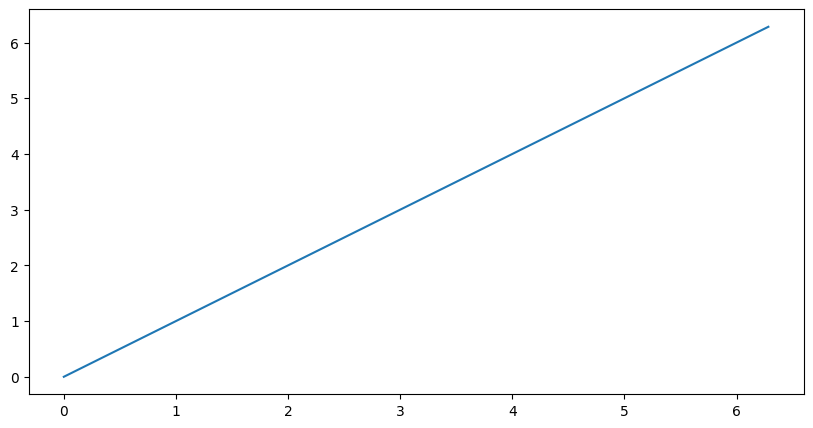

In [110]:
plt.plot(x, ramp(x,1,0))

### Sines and cosines

Let's plot the first 4 harmonics. 

Text(0, 0.5, 'sin(x)')

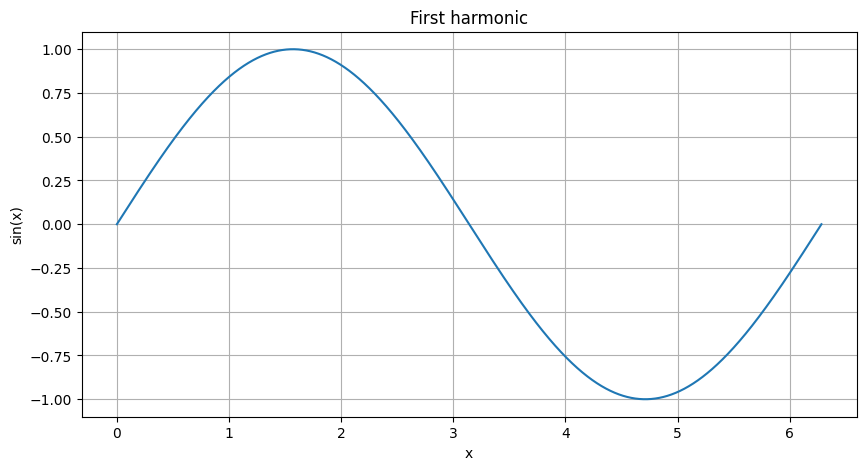

In [111]:
## sin(x)
plt.plot(x, np.sin(x))
plt.grid()
plt.xlabel('x')
plt.title('First harmonic')
plt.ylabel('sin(x)')

Text(0, 0.5, 'sin(2x)')

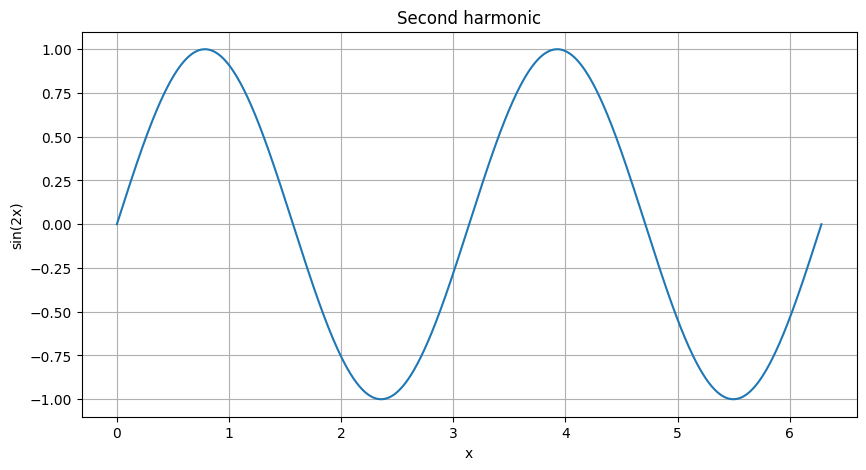

In [112]:
## sin(2x)
plt.plot(x, np.sin(2*x))
plt.grid()
plt.xlabel('x')
plt.title('Second harmonic')
plt.ylabel('sin(2x)')

Text(0, 0.5, 'sin(3x)')

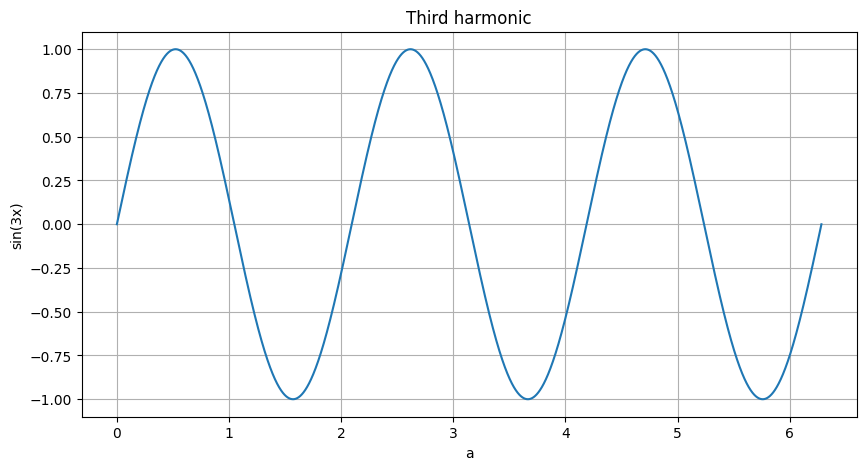

In [113]:
## sin(3x)
plt.plot(x, np.sin(3*x) )
plt.grid()
plt.xlabel('a')
plt.title('Third harmonic')
plt.ylabel('sin(3x)')

Text(0, 0.5, 'sin(4x)')

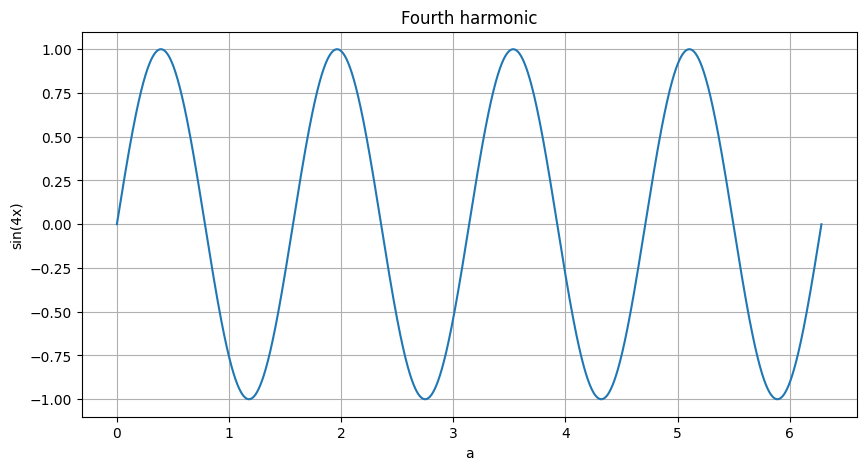

In [114]:
## sin(4x)
plt.plot(x, np.sin(4*x) )
plt.grid()
plt.xlabel('a')
plt.title('Fourth harmonic')
plt.ylabel('sin(4x)')

Now let's do the same thing with cosines.

Text(0, 0.5, 'cos(x)')

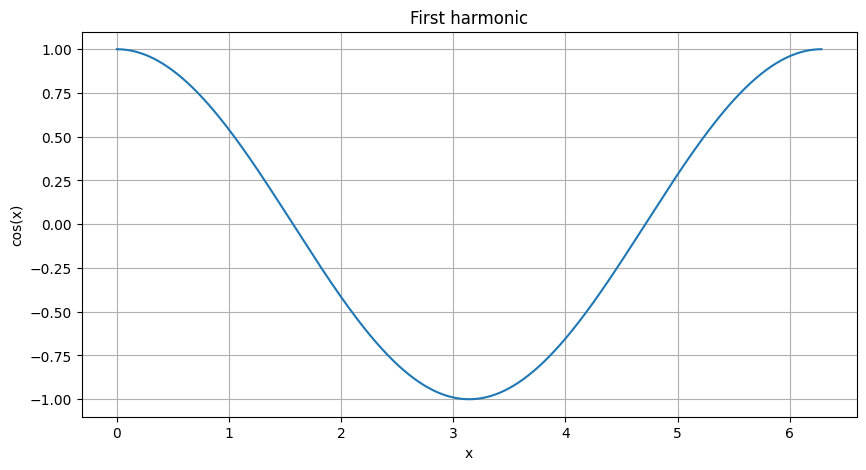

In [115]:
## cos(x)
plt.plot(x, np.cos(x))
plt.grid()
plt.xlabel('x')
plt.title('First harmonic')
plt.ylabel('cos(x)')

Text(0, 0.5, 'cos(2x)')

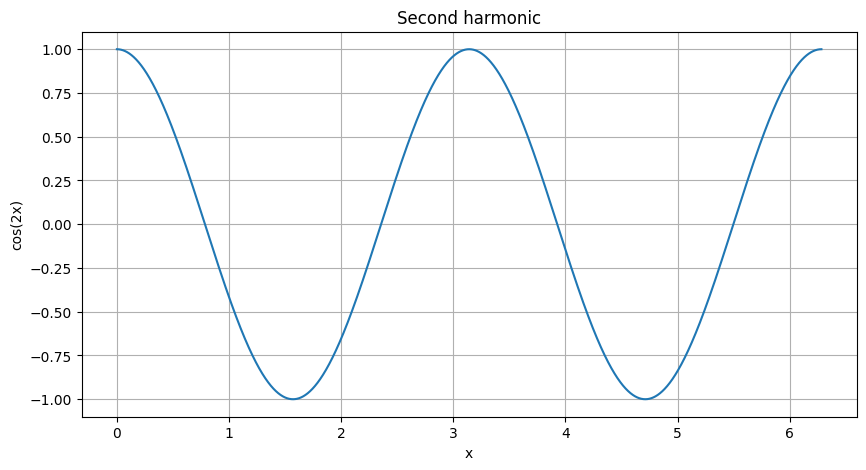

In [116]:
## cos(2x)
plt.plot(x, np.cos(2*x))
plt.grid()
plt.xlabel('x')
plt.title('Second harmonic')
plt.ylabel('cos(2x)')

If you need more than one signal in a single plot...

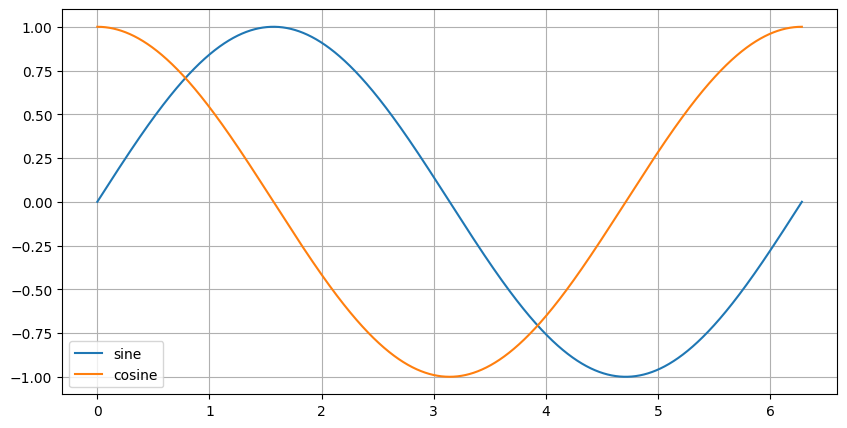

In [117]:
plt.plot(x, np.sin(x), label='sine')
plt.plot(x, np.cos(x), label='cosine')
plt.legend()
plt.grid()

If you want to split the figure in subfigures...

(-1.2, 1.2)

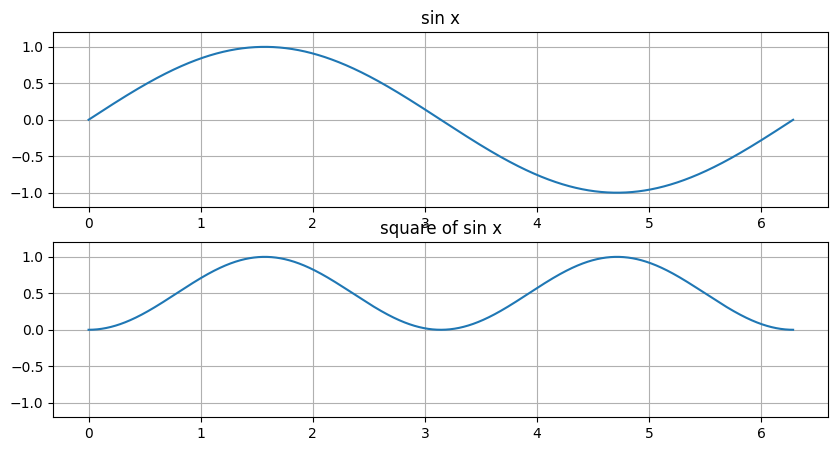

In [118]:
plt.subplot(2,1,1) # 2 rows, 1 column, write in position 1
plt.plot(x, np.sin(x))
plt.title('sin x')
plt.grid()
plt.ylim([-1.2,1.2]) # different scales on one of the axis may be misleading

plt.subplot(2,1,2) # 2 rows, 1 column, write in position 2
plt.plot(x, np.sin(x)**2) # square sine
plt.title('square of sin x')
plt.grid()
plt.ylim([-1.2,1.2])

### Triangle

Let's use the Scipy function Sawtooth

In [119]:
from scipy.signal import sawtooth

In [120]:
sawtooth??

Signature: sawtooth(t, width=1)
Source:   
def sawtooth(t, width=1):
    """
    Return a periodic sawtooth or triangle waveform.

    The sawtooth waveform has a period ``2*pi``, rises from -1 to 1 on the
    interval 0 to ``width*2*pi``, then drops from 1 to -1 on the interval
    ``width*2*pi`` to ``2*pi``. `width` must be in the interval [0, 1].

    Note that this is not band-limited.  It produces an infinite number
    of harmonics, which are aliased back and forth across the frequency
    spectrum.

    Parameters
    ----------
    t : array_like
        Time.
    width : array_like, optional
        Width of the rising ramp as a proportion of the total cycle.
        Default is 1, producing a rising ramp, while 0 produces a falling
        ramp.  `width` = 0.5 produces a triangle wave.
        If an array, causes wave shape to change over time, and must be the
        same length as t.

    Returns
    -------
    y : ndarray
        Output array containing the sawtooth wavefo

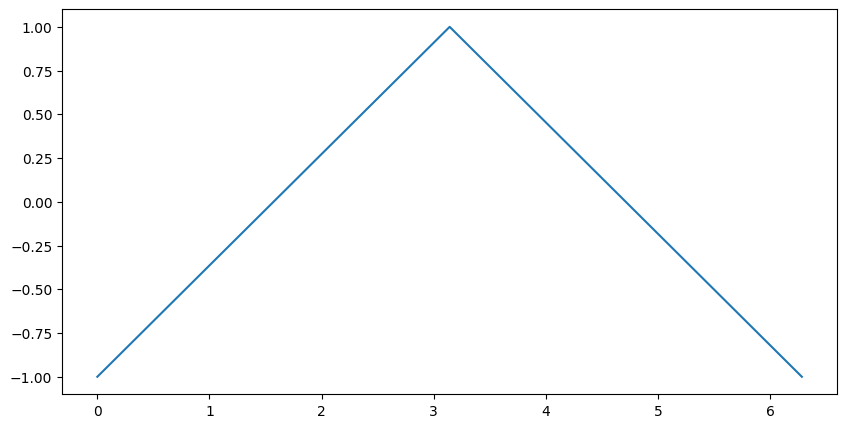

In [121]:
## set width = 0.5
plt.plot(x, sawtooth(x,0.5))

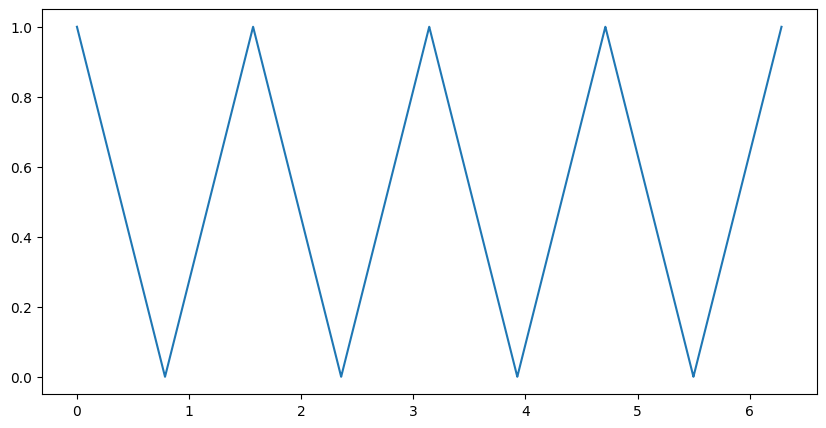

In [122]:
triang = np.abs(sawtooth(2*x,0.5))
plt.plot(x,triang)

### Square 

Similarly, we will use the SciPy function Square

1.000002338434997


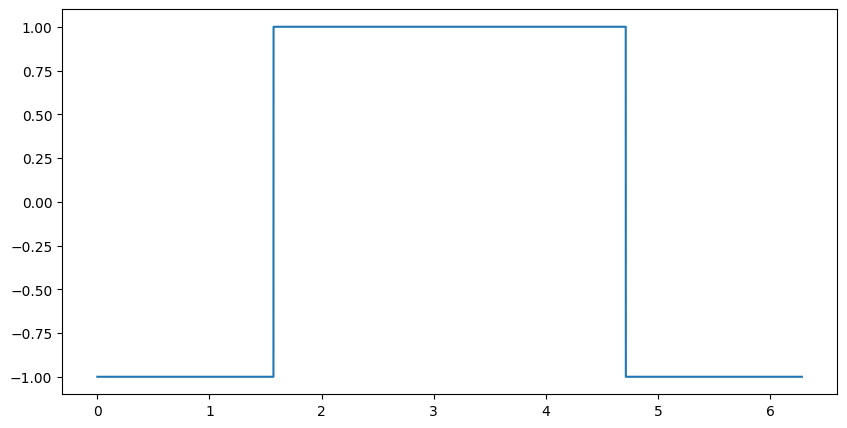

In [123]:
from scipy.signal import square

plt.plot(x, square(x-np.pi/2,0.5)) 

#check the normalisation factor

print(np.dot(square(x-np.pi/2,0.5),square(x-np.pi/2,0.5))/(2*np.pi/delta))

## Fourier series

We will now compute the Fourier series coefficients and reconstruct the signal with ita Fourier series. 

We are <b> assuming </b> that the function is always defined over $[0,2\pi]$. 

To write the function, *carefully read the class notes*.

In [124]:
def fseries(x, signal,K):
    
    """
    Returns an approximation of a given signal with a Fourier series approximation
    of K coefficients.
    
    Parameters:
    ----------
    x: independent variable (time)
    signal: function of x to be approximated
    K: number of harmonics to be used
    
    Returns:
    --------
    series: Fourier series of the signal
    a_0: coefficient with k=0 
    a: array of coefficients for odd components (cosine)
    b: array of coefficients for even components (sine)
    
    
    """
    
    ## reconstructed signal
    xr = np.zeros((len(x)))
    
    ## scaling factor
    c = (x[-1]-x[0])/len(x)
    
    a_0 = np.dot(signal, np.ones(len(x))) ## average of the signal over the range
    a_0 = c*a_0/np.pi
    
    
    ## Fourier coefficients arrays
    a = np.zeros(K)
    b = np.zeros(K)
    
    for k in range(1,K+1):
        ## evaluates coefficients
        a_k = c*np.dot(signal,np.cos(k*x))*1/np.pi
        a[k-1]=a_k
        b_k = c*np.dot(signal,np.sin(k*x))*1/np.pi
        b[k-1]=b_k
        
        ## computes series
        xr = xr + a_k*np.cos(k*x) + b_k*np.sin(k*x)
        series = 1/2*a_0+xr
    
    return series, a_0, a, b

## The approximation issue

Now you should define a function that, given a tolerance *tol*, approximates a given function *f* with *k* out of *K* components of the series.

The approximation criterion is defined as the difference between the norm of *f* and the norm of its finite approximation (Parseval).

In [125]:
def best_k(x, signal, K, tol):


    ## compute function norm keeping into account the scaling factor
    c = (x[-1]-x[0])/len(x) ##(b-a)/n
    norm = c*np.dot(signal, signal)

    for k in range(1,K+1):
        reconstructed_signal, a_0, a, b = fseries(x,signal, k)

        ## Parseval 
        approx_norm = np.pi*(np.sum(a**2) + np.sum(b**2) + a_0**2/4)

        delta = np.abs(approx_norm-norm)
        if (np.abs(delta) < tol):
            break
        
    print('the number of used harmonics is %d' % k)
    
    ## plots the signal and its approximation
    plt.plot(x, signal, 'r', label='original signal')
    plt.plot(x, reconstructed_signal, 'g', label='Fourier series')
    plt.legend(loc='upper right')
    return delta

the number of used harmonics is 1


np.float64(4.999908729308444e-05)

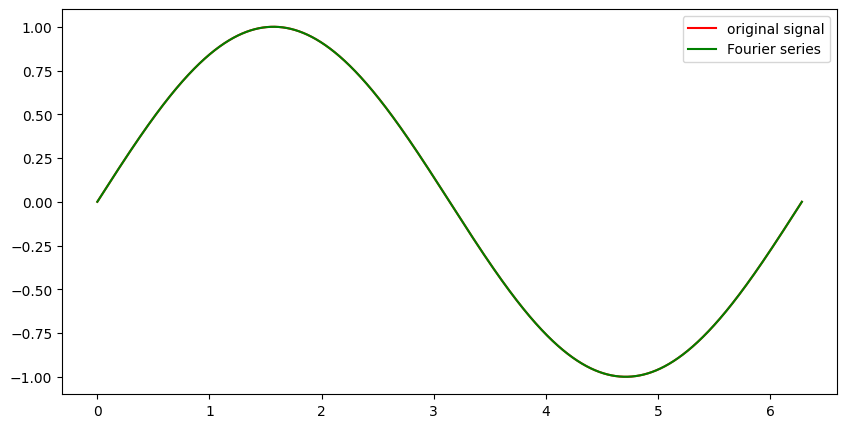

In [126]:
## CASE 1: sin(x)

signal = np.sin(x)
best_k(x, signal, 3, 10e-1)


the number of used harmonics is 3


np.float64(0.004835612072546347)

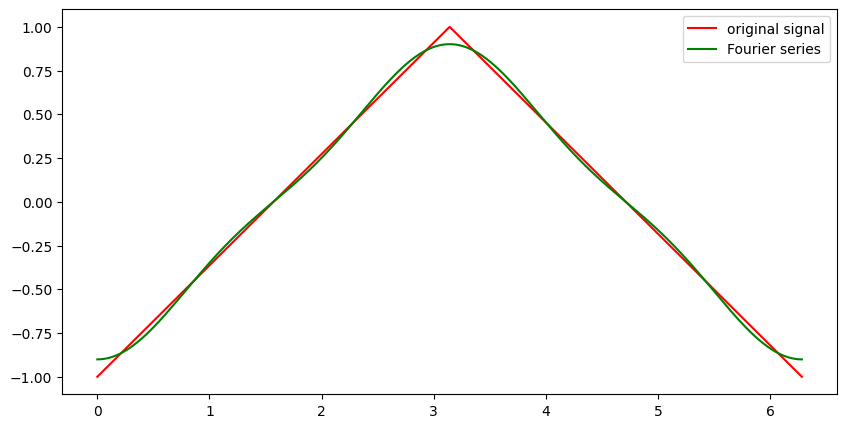

In [127]:
## CASE 2: TRIANGULAR FUNCTION

signal = sawtooth(x,0.5)
best_k(x, signal, 20, 10e-3)

the number of used harmonics is 60
0.796035813893694
the number of used harmonics is 40
0.9628420143218204
the number of used harmonics is 155
0.9970539746317062


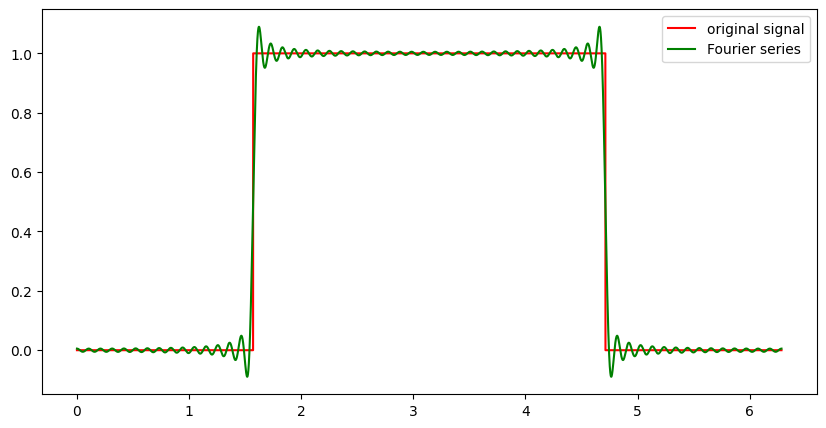

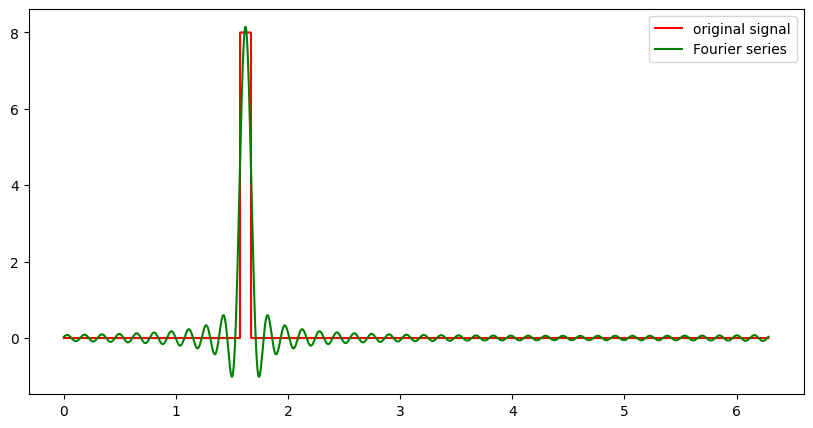

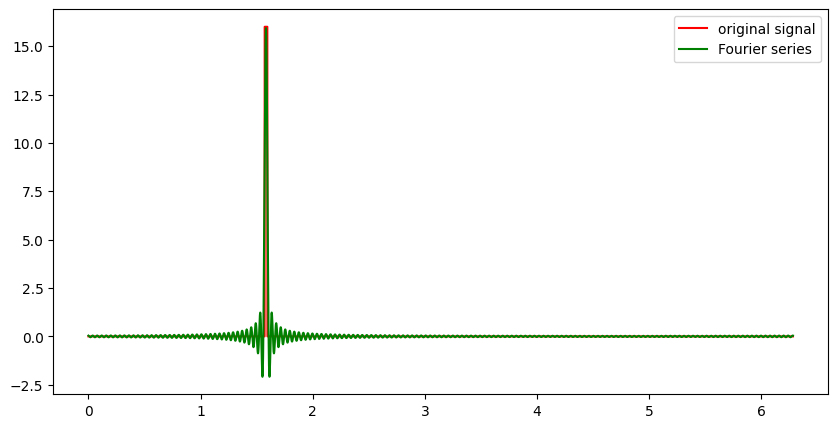

In [128]:
## CASE 3: SQUARE FUNCTION

## 3a 
signal = 1/2*(square(x-np.pi/2,0.5)+1)

delta = best_k(x, signal, 60, 10e-2)
print(delta)

## 3b 
plt.figure()
signal = 1/2*(square(x-np.pi/2,1/64)+1)*8
delta = best_k(x, signal, 60, 10e-1)
print(delta)

## 3c
plt.figure()
signal = 1/2*(square(x-np.pi/2,1/256)+1)*16
delta = best_k(x, signal, 200, 10e-1)
print(delta)

### Gibbs phenomenon

Using one of the square waves above, plot the approximation for different values of k ([10,30,80,200]). Observe what happens at the discontinuities.

The ripples next to the discontinuities are due to the <a href="https://en.wikipedia.org/wiki/Gibbs_phenomenon"> Gibbs phenomenon</a>. From this example we can sense that, in order to represent signals with strong discontinuities, we need high frequency components. This is a well-known effect that is widely used in image processing (e.g. edge detection).

In [129]:
## compute for each given K
fs_y_10 = fseries(x,square(x-np.pi/2,0.5),10) 
fs_y_30 = fseries(x,square(x-np.pi/2,0.5),30) 
fs_y_80 = fseries(x,square(x-np.pi/2,0.5),80) 
fs_y_200 = fseries(x,square(x-np.pi/2,0.5),200) 

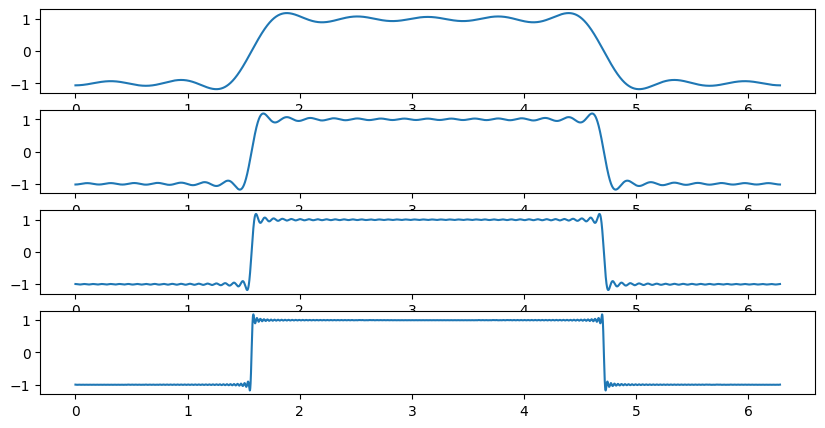

In [130]:
## plot
plt.subplot(4,1,1) # 4 rows, 1 column, write in position 1
plt.plot(x, fs_y_10[0])
plt.subplot(4,1,2) 
plt.plot(x, fs_y_30[0])
plt.subplot(4,1,3) 
plt.plot(x, fs_y_80[0])
plt.subplot(4,1,4) 
plt.plot(x, fs_y_200[0])

# Assignment 1

Make sure you understand the content of the Fourier Series notebook. Then, build a function f defined in the interval [a,b] with a and b randomaly sampled respectively between [-10, -2] and [2,10]. The function f should be linear in the interval [a, (a+b)/2] with f(a) = 0 and a slope c randomly sampled between [-10,10], and quadratic in the interval [(a+b)/2, b] with f(b) = 0 and a quadratic coefficient randomly sampled between [-10,10].

Turn in a report in which you 

-plot the function f and the first five harmonics 

-comment the approximation obtained by using the first 11, 21 and 41 terms in the Fourier Series expansion

-comment the Gibbs phenomenon at the midpoint (a+b)/2.

Random parameters:
Interval: [-3.60, 2.65]
Midpoint: -0.47
Linear slope (c): -5.80
Quadratic coefficient (d): 2.60


C:\Users\Mario\AppData\Local\Temp\ipykernel_3796\4239568253.py:39: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


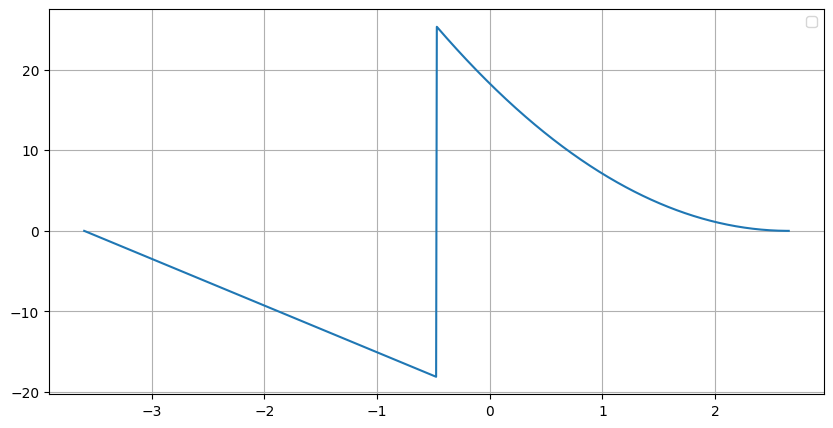

In [131]:
# Generate random parameters
a = np.random.uniform(-10, -2)  # Left boundary
b = np.random.uniform(2, 10)    # Right boundary
c = np.random.uniform(-10, 10)  # Linear slope
d = np.random.uniform(-10, 10)  # Quadratic coefficient

midpoint = (a + b) / 2

print(f"Random parameters:")
print(f"Interval: [{a:.2f}, {b:.2f}]")
print(f"Midpoint: {midpoint:.2f}")
print(f"Linear slope (c): {c:.2f}")
print(f"Quadratic coefficient (d): {d:.2f}")

def piecewise_function(x, a, b, c, d):
    """
    Piecewise function:
    - Linear in [a, (a+b)/2]: f(x) = c*(x-a)
    - Quadratic in [(a+b)/2, b]: f(x) = d*(x-b)^2
    """
    midpoint = (a + b) / 2
    result = np.zeros_like(x)
    
    # Linear part: f(a) = 0, slope = c
    mask1 = (x >= a) & (x <= midpoint)
    result[mask1] = c * (x[mask1] - a)
    
    # Quadratic part: f(b) = 0, coefficient = d
    mask2 = (x > midpoint) & (x <= b)
    result[mask2] = d * (x[mask2] - b)**2
    
    return result

n_points = 1000
x = np.linspace(a, b, n_points)
f = piecewise_function(x, a, b, c, d)

plt.plot(x, f)
plt.legend()
plt.grid()

the number of used harmonics is 1
390.3048406505292
the number of used harmonics is 2
234.2798243245232
the number of used harmonics is 3
171.2815128577355
the number of used harmonics is 4
133.26501516035557
the number of used harmonics is 5
109.80350475548983


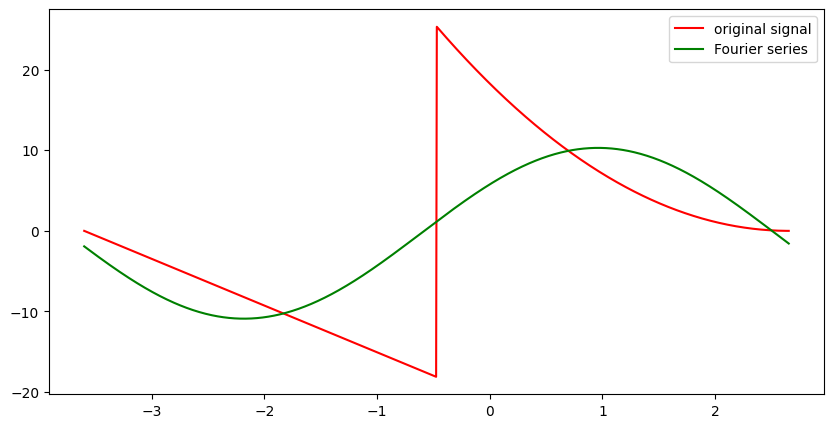

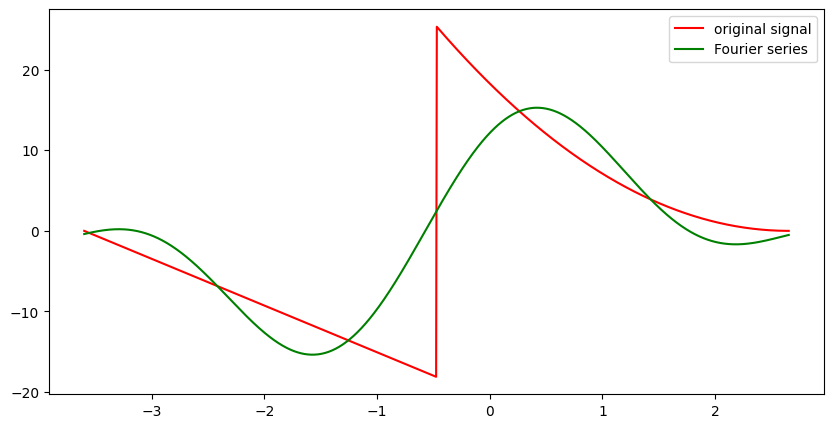

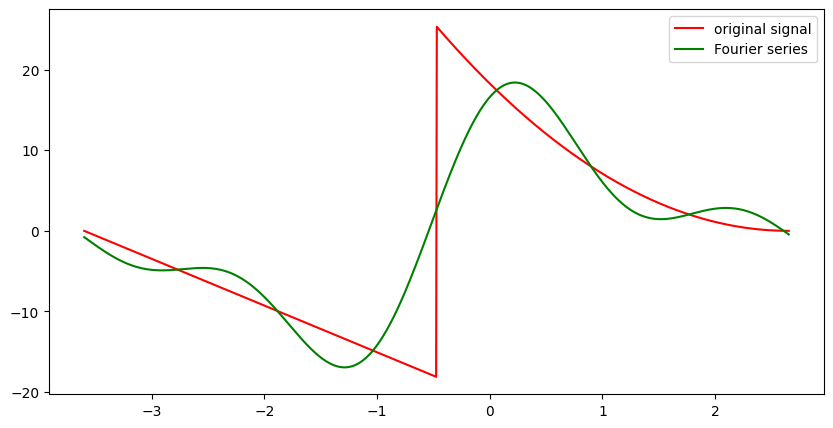

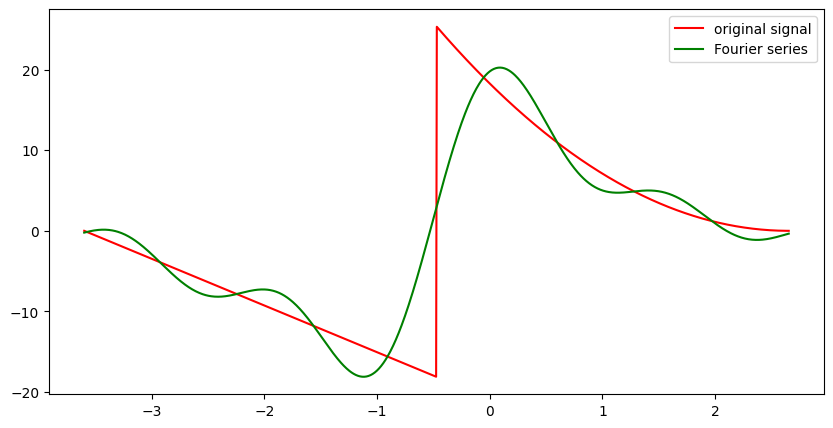

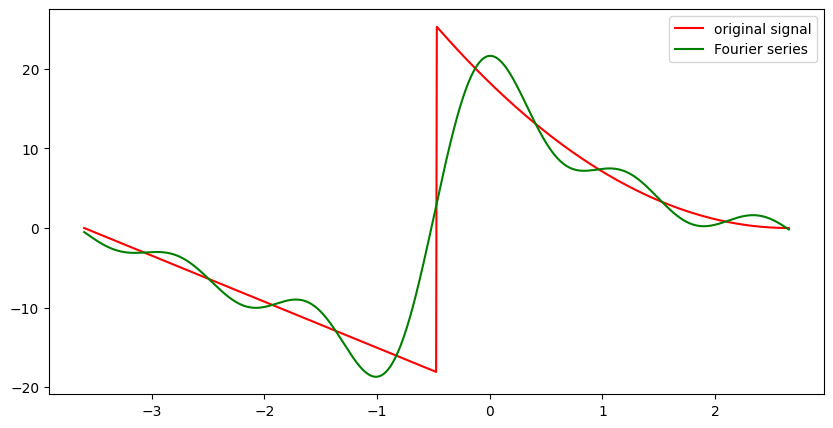

In [132]:
for i in range(1, 6):
    plt.figure()
    delta = best_k(x, f, i, 10e-2)
    print(delta)

the number of used harmonics is 11
53.16282331785101
the number of used harmonics is 21
28.89880661075165
the number of used harmonics is 41
15.408723681934589


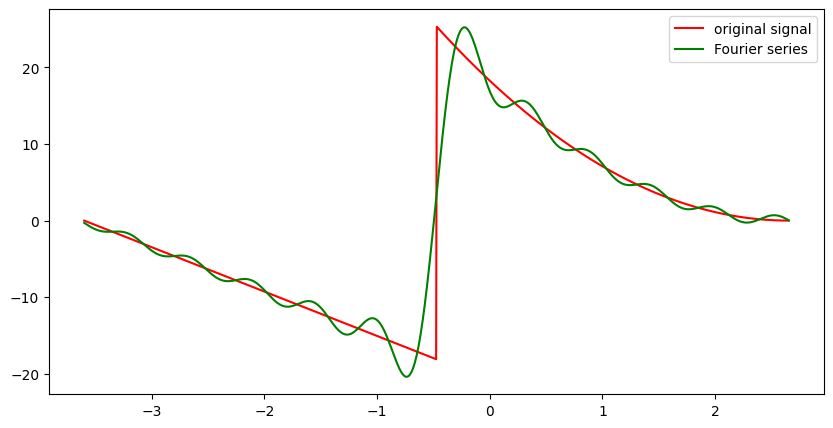

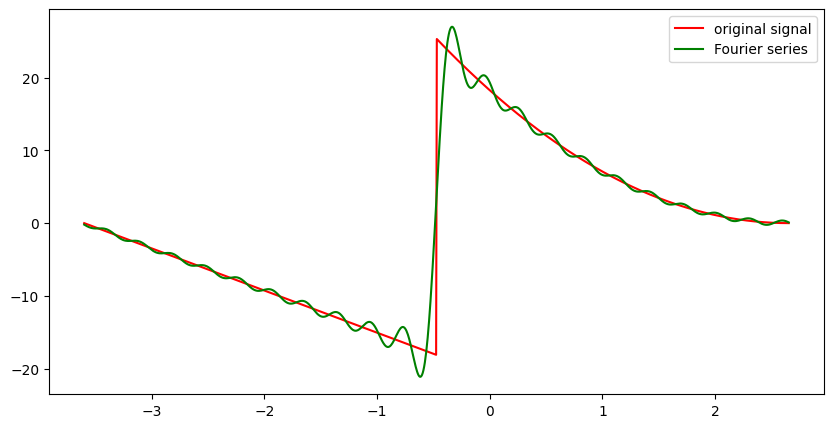

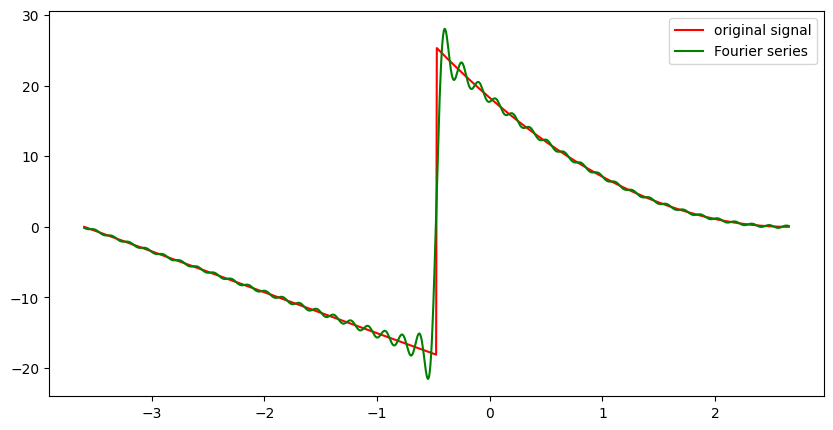

In [133]:
plt.figure()
delta = best_k(x, f, 11, 10e-2)
print(delta)

plt.figure()
delta = best_k(x, f, 21, 10e-1)
print(delta)

plt.figure()
delta = best_k(x, f, 41, 10e-1)
print(delta)


## Analysis of Fourier Series Approximation

**Convergence with increasing k**: As we increase the number of terms from 11 to 21 to 41 harmonics, the approximation becomes increasingly accurate in representing the original piecewise function.

**Gibbs phenomenon at the midpoint**: Most notably, the **Gibbs phenomenon** is clearly visible at the discontinuity point (midpoint = (a+b)/2) where the function transitions from linear to quadratic. This manifests as oscillatory behavior (ripples) near the discontinuity that persist even as k increases.

The Gibbs phenomenon is an inherent limitation of Fourier series when approximating functions with discontinuities, highlighting the trade-off between spectral efficiency and local accuracy at discontinuous points.